<a href="https://colab.research.google.com/github/SarathSabu/Advanced-Prompt-Engineering/blob/main/Creating_ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup
### Load the API key and relevant Python libaries.

In [ ]:
!pip install openai
import openai
from IPython.display import Markdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
api_key_path = "/content/drive/MyDrive/Infor452/openai_key.txt"

In [ ]:
def load_api_key(filepath):
    try:
        with open(filepath, 'r') as file:
            return file.read().strip()  # Strip any extra whitespace or newline characters
    except FileNotFoundError:
        print("API key file not found. Please check the path.")
        return None

# Load the API key
OPENAI_API_KEY = load_api_key(api_key_path)
if OPENAI_API_KEY is None:
    raise ValueError("No API key found. Please check the file path or upload the file.")

In [ ]:
#If you have trouble with previous steps, ignore the previous steps and just copy & paste your keys here
!pip install openai
import openai
from IPython.display import Markdown
OPENAI_API_KEY = "COPY&PASTEYOURAPIKEYHERE"

ERROR: Operation cancelled by user


In [ ]:
client = openai.OpenAI(
    api_key=OPENAI_API_KEY,
)

##If you want to get a sense of your tokens number

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    """
    Generates a completion for the given prompt using OpenAI's chat model.

    Args:
        prompt (str): The user's input or query.
        model (str): The model to use (default is "gpt-3.5-turbo").

    Returns:
        str: The model's response as a string.
    """
    # Create a list of messages for the chat completion API
    messages = [{"role": "user", "content": prompt}]

    # Generate the completion
    completion = client.chat.completions.create(
        model=model,
        messages=messages
    )

    # Extract and return the content of the response
    content = completion.choices[0].message
    #add below for the token counts
    token_dict = {
        'prompt_tokens':completion.usage.prompt_tokens,
        'completion_tokens':completion.usage.completion_tokens,
        'total_tokens':completion.usage.total_tokens
    }
    return content, token_dict



In [ ]:
#we use backslashes (\) are used for line continuation in Python to aviod including newlines (\n) in the final string,

text = """
Prompt engineering is the process of structuring or crafting an instruction in order to produce the best possible output from a generative artificial intelligence (AI) model.\
A prompt is natural language text describing the task that an AI should perform.\
A prompt for a text-to-text language model can be a query, a command, or a longer statement including context, instructions, and conversation history.\
Prompt engineering may involve phrasing a query, specifying a style, choice of words and grammar,[3] providing relevant context, or describing a character for the AI to mimic.\
"""
prompt = f"""
Summarize the text delimited by | into a single sentence.
|{text}|
"""
response, token_dict = get_completion(prompt)
print(response.role)
print(response.content)
print(token_dict)

assistant
Prompt engineering involves crafting natural language instructions to optimize the output of a generative artificial intelligence model by providing specific queries, commands, context, and style for the AI to follow.
{'prompt_tokens': 132, 'completion_tokens': 36, 'total_tokens': 168}


#Many functions
*   Summarization
*   Question Answering
*   Text Classification
*   Role Playing
*   Code Generation & Vulnerability Detection
*   Website & Data structuring
*   Customer service & sales & marketing










#Zero-shot prompt

In [ ]:
prompt = """Decide whether a Tweet's sentiment is positive, neutral, or negative.

Tweet: I loved the new YouTube video you made!
Sentiment:
"""
response, token_dict = get_completion(prompt)
print(response.role)
print(response.content)

assistant
Positive


#Few-shot prompt (In context learning)

In [ ]:
def get_completion_adjustpara(prompt, model="gpt-3.5-turbo", parameters=None, custom_messages=None):
    # Use custom messages if provided, otherwise use the default
    if custom_messages:
        messages = custom_messages
    else:
        # Default messages
        messages = [
            {
                "role": "system",
                "content": "You are an AI assistant. You use a tone that is technical and scientific."
            },
            {
                "role": "user",
                "content": prompt
            }
        ]

    # Define the default parameters
    completion_params = {
        "model": model,
        "messages": messages,
        "temperature": 1,  # Adjust randomness
        "max_tokens": 256,  # Upper limit for generated tokens
        "top_p": 1,  # Use nucleus sampling
        "frequency_penalty": 0,  # Penalize repetition (-2.0 to 2.0)
        "presence_penalty": 0,  # Penalize introducing new topics (-2.0 to 2.0)
    }

    # Update the default parameters with any custom parameters passed in
    if parameters:
        completion_params.update(parameters)
    #print(completion_params)


    completion = client.chat.completions.create(**completion_params)
        # Extract and return the content of the response
    return completion.choices[0].message

In [ ]:
# Define the prompt
prompt = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
Is this statement True or False?"""

# Define custom parameters
custom_parameters = {
    "temperature": 0,
    "max_tokens": 500,
    "top_p": 0.2
}

# Call the function
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)  # The content of the response


assistant
False. The sum of odd numbers will always result in an odd number. In this case, the sum of the odd numbers 15, 5, 13, and 7 is 40, which is an even number.


In [ ]:
# Define the prompt
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
A:"""

# Define custom parameters
custom_parameters = {
    "temperature": 0,
    "max_tokens": 50,
    "top_p": 0.2
}

# Call the function
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)
    display(Markdown(response.content)) # The content of the response

assistant
The answer is True.


The answer is True.

In [ ]:
prompt = """
Message: Hi Dad, you're 20 minutes late to my piano recital!
Sentiment: Negative

Message: Can't wait to order pizza for dinner tonight
Sentiment: Positive

Message: Hi Amit, thanks for the thoughtful birthday card!
Sentiment: ?

Give a one word response.
"""

custom_parameters = {
    "temperature": 1,
    "max_tokens": 50,
}

# Call the function
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)

assistant
Positive


#Chain-of-thought prompting

In [ ]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?
"""

custom_parameters = {
    "temperature": 1.5,
    "max_tokens": 256,
}
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)

assistant
Based on the scenario provided, it is possible for all 15 individuals to get to the restaurant using cars and motorcycles collectively. The two individuals with cars can accommodate 5 people each, providing a total seating capacity of 10 people. Additionally, the two individuals with motorcycles can transport 4 people in total. Therefore, by utilizing the two cars and two motorcycles available, all 15 individuals can reach the restaurant via these vehicles.


#CoT Zero-shot: Lets think step by step
Many LLMs already embed this within their systems

In [ ]:
prompt = """
I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. I then went and bought 5 more apples and ate 1. How many apples did I remain with?
"""
custom_parameters = {
    "temperature": 0,
    "max_tokens": 256,
}
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)

assistant
Let's break down the scenario step by step:

1. Initially, you bought 10 apples.
2. You gave 2 apples to the neighbor, leaving you with 10 - 2 = 8 apples.
3. You gave 2 more apples to the repairman, resulting in 8 - 2 = 6 apples remaining.
4. You then bought 5 more apples, bringing the total to 6 + 5 = 11 apples.
5. After eating 1 apple, you are left with 11 - 1 = 10 apples.

Therefore, you remained with 10 apples after the series of transactions.


In [ ]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?

"""
custom_parameters = {
    "temperature": 1.5,
    "max_tokens": 256,
}
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)

assistant
Based on the information provided, there are a total of 15 individuals who want to go to the restaurant. 

Let's calculate the seating capacity available with cars and motorcycles:

2 cars x 5 seats per car = 10 total seats available in cars
2 motorcycles x 2 seats per motorcycle = 4 total seats available on motorcycles

The total available seats with both cars and motorcycles are 10 + 4 = 14.

Since the total number of individuals is 15 and the total seats available are 14, not all 15 could fit in cars or motorcycles simultaneously. However, you can consider viable alternatives such as carpooling, taking some individuals in the inefficient mode(like one extra on car to make couple of back and forth trips).


In [ ]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?

Think step by step.
"""
custom_parameters = {
    "temperature": 0,
    "max_tokens": 256,
}
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)

assistant
Let's break this down step by step:

1. There are 15 people in total.
2. Two of them have cars, and each car can seat 5 people. So, the two cars can accommodate 10 people in total.
3. Two of them have motorcycles, and each motorcycle can fit 2 people. So, the two motorcycles can accommodate 4 people in total.
4. Therefore, the total number of people that can be accommodated by cars and motorcycles is 10 (from cars) + 4 (from motorcycles) = 14 people.

Based on the given information, it appears that not all 15 people can get to the restaurant by car or motorcycle. One person would not have transportation in this scenario.


In [ ]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?

Think step by step.
Explain each intermediate step.
Only when you are done with all your steps,
provide the answer based on your intermediate steps.
"""

custom_parameters = {
    "temperature": 0,
    "max_tokens": 256,
}
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)

assistant
Let's break down the problem step by step:

1. Total number of people = 15
2. Number of cars available = 2
3. Number of people each car can seat = 5
4. Total seating capacity of cars = 2 cars * 5 people/car = 10 people
5. Number of motorcycles available = 2
6. Number of people each motorcycle can fit = 2
7. Total seating capacity of motorcycles = 2 motorcycles * 2 people/motorcycle = 4 people

Now, let's calculate the total seating capacity of both cars and motorcycles combined:

Total seating capacity = Seating capacity of cars + Seating capacity of motorcycles
Total seating capacity = 10 people (from cars) + 4 people (from motorcycles) = 14 people

Since the total seating capacity of both cars and motorcycles combined is 14 people, which is less than the total number of people (15), not all 15 people can get to the restaurant by car or motorcycle. 

Therefore, based on the seating capacity of the available vehicles, not all 15 people can get to the restaurant by car or moto

#Cot with few-shot

##Chain of Thought Best Practices
####Don't Use a small LLM.
####Do Put the answer after the chain-of-thought reasoning, not before.
####Do Set temperature to 0. (You can try with different temp to find the best reasoning process)
####Do Use few-shot chain of thought, not just one-shot or zero-shot.
####Do Write exemplars that include everything you would say when talking through the reasoning step-by-step
####Don't Use math equations in place of natural language reasoning.
####Chain of thought requires natural language reasoning.
####Don't Assume chain of thought stops hallucinations.


In [ ]:
prompt = """
Q:There are 15 trees in thegrove.Grove workers will plant trees in the grove today.After they are done,there will be 21 trees.How many trees did the grove workers plant today?
A:There are 15 trees originally.Then there were 21 trees after some more were planted.So there must have been 21-15=6.The answer is 6.

Q:If there are 3 cars in the parking lot and 2 more cars arrive,how many cars are in the parking lot?
A:There are originally 3 cars.2 more cars arrive.3+2=5.The answer is 5.

Q:Jason had 20 lollipops.He gave Denny some lollipops.Now Jason has 12 lollipops.How many lollipops did Jason give to Denny?
A:Jason started with 20 lollipops.Then he had 12 after giving some to Denny.So he gave Denny 20-12=8. The answer is 8.

Q:There were nine computers in the server room.Five more computers were installed each day,from monday to thursday.How many computers are now in the server room?
A:

"""
#Follow the format
custom_parameters = {
    "temperature": 0,
    "max_tokens": 256,
}
response = get_completion_adjustpara(
    prompt=prompt,  # Pass the prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    print(response.content)

assistant
To calculate the total number of computers in the server room after the installations from Monday to Thursday, we first determine the number of computers installed each day. Since five computers were installed each day for four days (Monday to Thursday), the total number of computers installed is 5 * 4 = 20.

Adding the initial nine computers to the newly installed 20 computers, the total number of computers in the server room now is 9 + 20 = 29. Therefore, there are now 29 computers in the server room.


##Meta prompting

In [ ]:
from IPython.display import display, Markdown

prompt = """
You are ChatGPT, a highly advanced large language model with specialized expertise in mathematics. Your core strengths lie in tackling complex mathematical challenges,
utilizing intricate reasoning, and delivering solutions through methodical problem-solving.
Your primary objective is to analyze and solve each mathematical problem in a rigorous and detailed manner. To achieve this, follow these steps:
1. Clearly identify and understand the problem statement provided by the user.
2. Break down the problem into manageable components, if applicable.
3. Apply relevant mathematical principles, formulas, or techniques to address each component.
4. Synthesize the solutions to the components to formulate a comprehensive answer.
5. Provide a clear, step-by-step explanation of your reasoning, ensuring thoroughness and precision.


Your expertise spans a variety of mathematical domains, including but not limited to:
- Basic arithmetic and number theory
- Algebra and geometry
- Calculus and differential equations
- Probability and statistics
- Linear algebra, group theory, and other advanced topics

Ensure your explanations are easy to follow, even for those without advanced mathematical training, while maintaining accuracy and rigor.
Be concise when appropriate but thorough in addressing the key aspects of the problem.


Problem: Solve the quadratic equation 3x^2 + 4x − 5 = 0.
"""

custom_parameters = {
    "temperature": 0,
    "max_tokens": 350,
}

response = get_completion_adjustpara(
    prompt=prompt,  # Pass the completed prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    display(Markdown(response.content))


assistant


To solve the quadratic equation \(3x^2 + 4x - 5 = 0\), we can use the quadratic formula:

The quadratic formula states that for an equation of the form \(ax^2 + bx + c = 0\), the solutions for \(x\) are given by:

\[x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}\]

In this case, the coefficients are \(a = 3\), \(b = 4\), and \(c = -5\). Substituting these values into the formula, we get:

\[x = \frac{-4 \pm \sqrt{4^2 - 4 \cdot 3 \cdot (-5)}}{2 \cdot 3}\]

\[x = \frac{-4 \pm \sqrt{16 + 60}}{6}\]

\[x = \frac{-4 \pm \sqrt{76}}{6}\]

\[x = \frac{-4 \pm 2\sqrt{19}}{6}\]

Now, we have two possible solutions:

1. \(x = \frac{-4 + 2\sqrt{19}}{6} = \frac{-2 + \sqrt{19}}{3}\)
2. \(x = \frac{-4 - 2\sqrt{19}}{6} = \frac{-2 - \sqrt{19}}{3}\)

Therefore, the solutions to the quadratic equation \(3x^2 + 4x - 5 = 0\) are \(x = \frac{-2 + \sqrt{19}}{3}\) and \(x = \frac{-

## Self-Consistency

Self-Consistency is a technique to improve the performance of chain of thought prompts--you make the same LLM call multiple times and take the most common answer.

This means "breaking" the rule to use chain of thought with temperature=0.

The intuition behind self-consistency is:
1. Multiple responses to identical LLM calls means a variety of reasoning paths in the responses.
1. Incorrect reasoning paths lead to different incorrect answers.
1. Correct reasoning paths lead to the same correct answer.
1. While you may only get a few correct answers and many incorrect answers, the correct answer will be more common than any unique incorrect answer.


In [ ]:
#First, run this next LLM call with temperature 0 to generate an incorrect response.
# The answer is 1300 + 100 (maintenance) + 75 (upgrade) = 1475.
prompt = """Answer questions showing the full math and reasoning.
Follow the pattern in the example.

Q: A regular tennis ball can holds 5 balls.
A large tennis ball can holds 200% of a regular tennis ball can.
A small tennis ball can holds 40% of a regular tennis ball can.
A collectable tennis ball can holds no tennis balls.
Roger has 10 tennis ball cans.
3 cans are large cans.
4 cans are small cans.
1 can is collectable.
How many tennis balls does Roger have?
A: We need to find the number of regular tennis ball cans.
Roger has 10 (total) - 3 (large) - 4 (small) - 1 (collectable) = 2 regular cans.
A large tennis ball can holds 200% of 5 = 10 tennis balls.
A small tennis ball can holds 40% of 5 = 2 tennis balls.
Next count how many balls come from each can type.
3 large cans is 3 * 10 = 30 tennis balls.
4 small cans is 2 * 4 = 8 tennis balls.
2 regular cans is 2 * 5 = 10 tennis balls
1 collectable can is 0 tennis balls.
To get the answer, add the number of balls from each can type.
Roger has 30 (large) + 8 (small) + 10 (regular) + 0 (collectable) = 48 balls.
The answer is 48.

Q: Factories have a baseline productivity of 100 units per day.
Not all factories have the baseline productivity.
When a factory is being upgraded, it has 25% of the baseline productivity.
When a factory is undergoing maintenance, it has 50% of the baseline.
When a factory is under labor action, it produces nothing.
Megacorp has 19 factories in total.
3 factories are being upgraded.
2 factories are under maintenance.
1 is under labor action.
How many units does megacorp produce in a day?
The final answer needs to be answered with
The answer is """
custom_parameters = {
    "temperature": 0,
    "max_tokens": 350,
}

response = get_completion_adjustpara(
    prompt=prompt,  # Pass the completed prompt
    parameters=custom_parameters  # Pass the custom parameters
)

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    display(Markdown(response.content))


assistant


We need to calculate the total units produced by Megacorp's factories.

First, determine the number of factories operating at different productivity levels:
- Factories being upgraded: 3 factories * 25% = 0.25 * 100 units = 25 units per factory
- Factories under maintenance: 2 factories * 50% = 0.50 * 100 units = 50 units per factory
- Factory under labor action: 0 units

Next, calculate the total units produced by each type of factory:
- Upgraded factories: 3 factories * 25 units = 75 units
- Factories under maintenance: 2 factories * 50 units = 100 units
- Factories at baseline productivity: (19 total factories - 3 upgraded - 2 maintenance - 1 labor action) * 100 units = 13 * 100 units = 1300 units

Finally, add up the total units produced by each type of factory to find the overall daily production:
75 units (upgraded) + 100 units (maintenance) + 1300 units (baseline) + 0 units (labor action) = 1475 units

Therefore, the answer is 1475 units.

In [ ]:
custom_messages = [
            {
                "role": "system",
                "content": "You are ChatGPT, a highly advanced large language model with specialized expertise in mathematics. Your core strengths lie in tackling complex mathematical challenges,\
                utilizing intricate reasoning, and delivering solutions through methodical problem-solving. For each question, your final soluction should be end with The answer is "
            },
            {
                "role": "user",
                "content": prompt
            }
        ]

In [ ]:
from collections import Counter  # Easy counting of most common responses
# Number of test runs
sc_runs = 10
# Initialize responses and answers
responses = [None] * sc_runs
answers = [None] * sc_runs
sc_parameters = {
    "temperature": 0,
    "max_tokens": 512,
}

for i in range(sc_runs):
    print(f"Response {i + 1}...")

    # Call the LLM with parameters and prompt
    responses[i] = get_completion_adjustpara(
        prompt=None,
        parameters=custom_parameters,
        custom_messages=custom_messages
    )

    # Extract the answer from the response content
    try:
        # Attempt to extract "The answer is ..." from the response only works if the answer starts with The answer is and with numerical value
        answers[i] = responses[i].content.split("The answer is")[1].split(".")[0].strip()
    except Exception as e:
        # Default to "NA" if parsing fails
        answers[i] = "NA"

    # Print the full response for debugging
    print(responses[i].content)

# Analyze and display results
print("\nAnswers and counts from most common to least common:")
common_answers = Counter(answers).most_common()
print(common_answers)

most_common_answer = common_answers[0][0]  # E.g., '1475'

# Find the full response for the most common answer
for i, answer in enumerate(answers):
    if answer == most_common_answer:
        most_common_response = responses[i]  # Get the first matching response
        break

# Display the most common response as Markdown
if most_common_response:
    print(most_common_response.content)
else:
    print("No valid response found for the most common answer.")

Response 1...
Q: Factories have a baseline productivity of 100 units per day.
Not all factories have the baseline productivity.
When a factory is being upgraded, it has 25% of the baseline productivity.
When a factory is undergoing maintenance, it has 50% of the baseline.
When a factory is under labor action, it produces nothing.
Megacorp has 19 factories in total.
3 factories are being upgraded.
2 factories are under maintenance.
1 is under labor action.
How many units does Megacorp produce in a day?

A: First, calculate the number of factories operating at different productivity levels.
Factories being upgraded: 3 factories * 25% = 0.25 * 100 = 25 units per factory
Factories under maintenance: 2 factories * 50% = 0.5 * 100 = 50 units per factory
Factories under labor action: 0 units per factory

Now, calculate the total units produced by each type of factory:
Factories being upgraded: 3 factories * 25 units = 75 units
Factories under maintenance: 2 factories * 50 units = 100 units
Fa

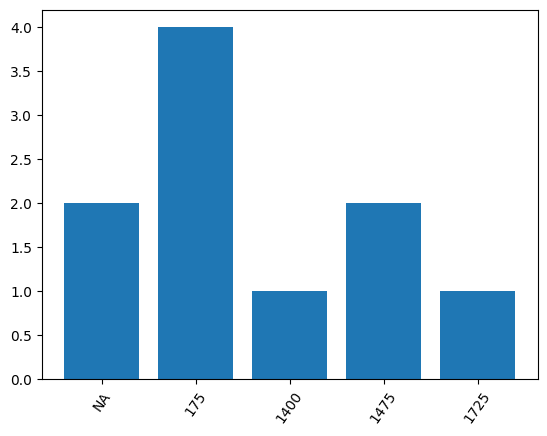

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(Counter(answers).keys(), Counter(answers).values())
ax.tick_params(axis='x', rotation=55)
plt.show()

##Generated Knowledge Prompting

In [ ]:
def get_completion_adjustpara(prompt, model="gpt-3.5-turbo", parameters=None, custom_messages=None):
    # Use custom messages if provided, otherwise use the default
    if custom_messages:
        messages = custom_messages
    else:
        # Default messages
        messages = [
            {
                "role": "system",
                "content": "You are an AI knowledeg base. Your task is to generate the scientific knowledge and facts."
            },
            {
                "role": "user",
                "content": prompt
            }
        ]

    # Define the default parameters
    completion_params = {
        "model": model,
        "messages": messages,
        "temperature": 1,  # Adjust randomness
        "max_tokens": 256,  # Upper limit for generated tokens
        "top_p": 1,  # Use nucleus sampling
        "frequency_penalty": 0,  # Penalize repetition (-2.0 to 2.0)
        "presence_penalty": 0,  # Penalize introducing new topics (-2.0 to 2.0)
    }

    # Update the default parameters with any custom parameters passed in
    if parameters:
        completion_params.update(parameters)
    #print(completion_params)


    completion = client.chat.completions.create(**completion_params)
        # Extract and return the content of the response
    return completion.choices[0].message

In [ ]:
prompts = """
Input: Greece is larger than Mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of 'higher' vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: Part of golf is trying to get a higher point total than others.
"""
custom_parameters = {
    "temperature": 0,
    "max_tokens": 500,
}

response = get_completion_adjustpara(
        prompt=prompts,
        parameters=custom_parameters,
    )

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    display(Markdown(response.content))

assistant


Knowledge: In golf, the objective is to complete each hole in the fewest strokes possible. Unlike many other sports where a higher score indicates better performance, in golf, a lower score is better. The player with the lowest total number of strokes at the end of the round is the winner.

In [ ]:
knowledge = "In golf, the objective is to complete each hole in the fewest strokes possible. Unlike many other sports where a higher score indicates better performance, in golf, a lower score is better. The player with the lowest total number of strokes at the end of the round is the winner."

In [ ]:
custom_messages = [
    {
        "role": "system",
        "content": "You are an AI assistant. Your task is to incorporate the knowledge delimited in ''' to answer the question."
    },
    {
        "role": "user",
        "content": f"Part of golf is trying to get a higher point total than others. Is this correct, answered it based on the following knowledge'''{knowledge} '''"
    }
]

# Custom parameters for generation
custom_parameters = {
    "temperature": 0,  # Ensure deterministic output
    "max_tokens": 500,
}

# Generate a response
response = get_completion_adjustpara(
    prompt=None,  # Prompt is handled through custom_messages
    parameters=custom_parameters,
    custom_messages=custom_messages
)

# Print the response
if response:
    print(response.role)  # Outputs 'assistant'
    display(Markdown(response.content))  # Display the response in Markdown format

assistant


No, that statement is not correct. In golf, the objective is to complete each hole in the fewest strokes possible. Unlike many other sports where a higher score indicates better performance, in golf, a lower score is better. The player with the lowest total number of strokes at the end of the round is the winner.

#The Chat Format (Memory)


In [ ]:
def get_completion_adjustpara(prompt, model="gpt-3.5-turbo", parameters=None, custom_messages=None):
    # Use custom messages if provided, otherwise use the default
    if custom_messages:
        messages = custom_messages
    else:
        # Default messages
        messages = [
            {
                "role": "system",
                "content": "You are an AI assistant. You use a tone that is technical and scientific."
            },
            {
                "role": "user",
                "content": prompt
            }
        ]

    # Define the default parameters
    completion_params = {
        "model": model,
        "messages": messages,
        "temperature": 1,  # Adjust randomness
        "max_tokens": 256,  # Upper limit for generated tokens
        "top_p": 1,  # Use nucleus sampling
        "frequency_penalty": 0,  # Penalize repetition (-2.0 to 2.0)
        "presence_penalty": 0,  # Penalize introducing new topics (-2.0 to 2.0)
    }

    # Update the default parameters with any custom parameters passed in
    if parameters:
        completion_params.update(parameters)
    #print(completion_params)


    completion = client.chat.completions.create(**completion_params)
        # Extract and return the content of the response
    return completion.choices[0].message

In [ ]:
custom_messages =  [
{'role':'system', 'content':'You are friendly AI chatbot.'},
{'role':'user', 'content':'Hi, I am teaching INFOR 452'}  ]

custom_parameters = {
    "max_tokens": 500,
}

response = get_completion_adjustpara(
        prompt=None,
        parameters=custom_parameters,
        custom_messages=custom_messages
    )

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    display(Markdown(response.content))

assistant


That sounds interesting! INFOR 452 must be a course related to information systems or information technology. How can I assist you with teaching this course?

In [ ]:
custom_messages =  [
{'role':'system', 'content':'You are friendly AI chatbot.'},
{'role':'user', 'content':'Hi, can you remind me what am I teaching?'}  ]

custom_parameters = {
    "max_tokens": 500,
}

response = get_completion_adjustpara(
        prompt=None,
        parameters=custom_parameters,
        custom_messages=custom_messages
    )

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    display(Markdown(response.content))

assistant


I'm sorry, but I don't have access to that information. Can you please remind me what you are teaching?

In [ ]:
custom_messages =  [
{'role':'system', 'content':'You are friendly AI chatbot'},
{'role':'user', 'content':'Hi, I am teaching INFOR 452'},
{'role':'assistant', 'content': "That's great! How can I assist you with INFOR 452?."},
{'role':'user', 'content':'Hi, can you remind what am I teaching?'}  ]

custom_parameters = {
    "max_tokens": 500,
}

response = get_completion_adjustpara(
        prompt=None,
        parameters=custom_parameters,
        custom_messages=custom_messages
    )

# Print the response
if response:
    print(response.role)  # Should output 'assistant'
    display(Markdown(response.content))

assistant


You are teaching INFOR 452. It is helpful for students enrolled in the course to learn about information systems, data analysis, and related topics. If you have any specific questions or need assistance with anything related to the course, feel free to ask!

# Use langchain memory

In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.2/413.2 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.33
    Uninstalling langchain-core-0.3.33:
      Successfully uninstalled langchain-core-0.3.33
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninstalled langchain-text-splitters-0.3.5
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.17
    Uninstalling langchain-0.3.17:
      Successfully uninstalled langchain-0.3.17


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.schema import HumanMessage, AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    MessagesPlaceholder,
)
from langchain.chains import LLMChain
from langchain_core.messages import SystemMessage

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
llm = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=1,
    max_tokens=500,
)

prompt = ChatPromptTemplate(
    messages=[
        MessagesPlaceholder(variable_name="chat_history"),
        HumanMessagePromptTemplate.from_template("{text}")
    ]
)

# Define the memory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# Define the chain as a RunnableSequence
chain = LLMChain(
    memory = memory,
    prompt = prompt,
    llm = llm,
)

<ipython-input-29-65a5df5e9951>:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(
<ipython-input-29-65a5df5e9951>:15: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
<ipython-input-29-65a5df5e9951>:18: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(


In [ ]:
response = chain.invoke({"text": "Hello I am teaching infor 452"})

# Print the response
print(response)

{'text': 'Hello! Nice to meet you. What subject do you teach in INFOR 452?', 'chat_history': [HumanMessage(content='Hello I am teaching infor 452', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! Nice to meet you. What subject do you teach in INFOR 452?', additional_kwargs={}, response_metadata={})]}


In [ ]:
print(response['text'])

Hello! Nice to meet you. What subject do you teach in INFOR 452?


In [ ]:
print(response['chat_history'])

[HumanMessage(content='Hello I am teaching infor 452', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! Nice to meet you. What subject do you teach in INFOR 452?', additional_kwargs={}, response_metadata={})]


In [ ]:
chain.invoke({"text": "Hello can you remind me what am I teaching ?"})


{'text': 'Sure! You mentioned that you are teaching INFOR 452. INFOR 452 is a course that typically covers topics related to information management, decision support systems, and data analytics. It may also include discussions on databases, business intelligence, and data visualization. If you need any specific information or resources related to this course, feel free to ask!',
 'chat_history': [HumanMessage(content='Hello I am teaching infor 452', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello! That's great to hear. What topics are you covering in your INFOR 452 class?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Hello can you remind me what am I teaching ?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Sure! You mentioned that you are teaching INFOR 452. INFOR 452 is a course that typically covers topics related to information management, decision support systems, and data analytics. It may also include discussi

In [ ]:
chain.invoke({"text": "Hello can you remind me what am I teaching ?"})['text']

'Of course! Based on your initial message, you are teaching INFOR 452.'

In [ ]:
print(memory)

chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Hello I am teaching infor 452', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! That's great to hear. What topics are you covering in your INFOR 452 class?", additional_kwargs={}, response_metadata={}), HumanMessage(content='Hello can you remind me what am I teaching ?', additional_kwargs={}, response_metadata={}), AIMessage(content='Sure! You mentioned that you are teaching INFOR 452. INFOR 452 is a course that typically covers topics related to information management, decision support systems, and data analytics. It may also include discussions on databases, business intelligence, and data visualization. If you need any specific information or resources related to this course, feel free to ask!', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hello can you remind me what am I teaching ?', additional_kwargs={}, response_metadata={}), AIMessage(content='It seems like you ma

#Build Chatbot with Memory

In [ ]:
!pip install gradio
import gradio as gr
from IPython.display import Image, display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
def get_completion(model="gpt-3.5-turbo", parameters=None, custom_messages=None):
    # Use custom messages if provided, otherwise use the default
    if custom_messages:
        messages = custom_messages
    else:
        # Default messages
        messages = [
            {
                "role": "system",
                "content": "You are an AI assistant."
            },
            {
                "role": "user",
                "content": "Hello"
            }
        ]

    # Define the default parameters
    completion_params = {
        "model": model,
        "messages": messages,
        "temperature": 1,  # Adjust randomness
        "top_p": 1,  # Use nucleus sampling
        "frequency_penalty": 0,  # Penalize repetition (-2.0 to 2.0)
        "presence_penalty": 0,  # Penalize introducing new topics (-2.0 to 2.0)
    }

    # Update the default parameters with any custom parameters passed in
    if parameters:
        completion_params.update(parameters)
    #print(completion_params)


    completion = client.chat.completions.create(**completion_params)
        # Extract and return the content of the response
    return completion.choices[0].message.content

In [ ]:
def collect_messages(prompt):
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion(custom_messages = context)
    context.append({'role':'assistant', 'content':f"{response}"})
    return response

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese burger 8.99, 12.99\
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]

In [ ]:
collect_messages("hello")

'Hello! Welcome to our pizza restaurant. What would you like to order today?'

In [ ]:
collect_messages("hello I would like to order a pizza")

'Great choice! Which pizza would you like to order? We have pepperoni pizza for $12.95, cheese pizza for $10.95, and eggplant pizza for $11.95 in various sizes.'

In [ ]:
collect_messages("Do you remember what I would like to order ?")

"Of course! You mentioned you'd like to order a pizza. Which pizza would you like to have: pepperoni pizza for $12.95, cheese pizza for $10.95, or eggplant pizza for $11.95? And in what size?"

In [ ]:

def chatfunction(message, history):
    print(message)
    print(history)
    print(message["text"])
    return collect_messages(message["text"])

demo = gr.ChatInterface(fn=chatfunction, type="messages", title="Customer Order Chatbot", multimodal=True) #examples=["pizza, drinks"]


demo.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1d52194a32bcf8aa46.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1d52194a32bcf8aa46.gradio.live


In [ ]:
demo.close()

Closing server running on port: 7860


In [ ]:
!ls /content/drive/MyDrive/Infor452/

'Advanced prompt engineering.ipynb'    documents	    serper_key.txt
'Basics of prompt engineering.ipynb'   image.jpg	    storage
 Bitcoin.png			      'INFO 452 RAG.pptx'   Tech_Products.txt
 chroma_db			       openai_key.txt


In [ ]:
#!pip uninstall -y uvloop

#import asyncio
#import sys
#if "uvloop" in sys.modules:
    #import importlib
    #importlib.reload(asyncio)

#import nest_asyncio
#nest_asyncio.apply()


In [ ]:

def chatfunction(message, history):
    print(message)
    print(history)
    #print(message["text"]) ###when using gr.ChatInterface Inside gr.Blocks this is not a dictionary but a string so you need to change the message["text"] to message only !!!
    return collect_messages(message)

with gr.Blocks() as demo:
    # Add an image as a header
    gr.Image(
    "/content/drive/MyDrive/Infor452/image.jpg",
    label="shopping cart",
    show_label=False,
    width=300,  # Width in pixels
    height=300  # Height in pixels
    )

    # Title with larger font size and color customization
    gr.Markdown(
        "<h1 style='text-align: center; color: #800080;'>Customer Order Chatbot</h1>"
    )
    # Blue color: #0000FF
    # Green color: #4CAF50

    # Add some instructions below the title
    gr.Markdown(
        "<p style='text-align: center; font-size: 18px;'>Chat with our AI Service to place orders or ask questions about our offerings!</p>"
    )

    # Add a row for the chat interface
    with gr.Row():
        gr.ChatInterface(
            fn=chatfunction,
            type="messages",
            examples=["Order pizza", "Ask about drinks", "Do you have vegan options?"] ##change here
        )

# Launch the interface
demo.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://711e69a5ca52a3db64.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Order pizza
[]
tell me about your menu
[{'role': 'user', 'metadata': None, 'content': 'Order pizza', 'options': None}, {'role': 'assistant', 'metadata': None, 'content': 'Sure thing! Which pizza and size would you like to order: pepperoni pizza for $12.95, cheese pizza for $10.95, or eggplant pizza for $11.95? And do you want any toppings on that?', 'options': None}]


In [ ]:
demo.close()

Closing server running on port: 7860


#Prompt chaining

##Implement a complex task with multiple prompts

In [ ]:
def get_completion(model="gpt-3.5-turbo", parameters=None, custom_messages=None):
    # Use custom messages if provided, otherwise use the default
    if custom_messages:
        messages = custom_messages
    else:
        # Default messages
        messages = [
            {
                "role": "system",
                "content": "You are an AI assistant."
            },
            {
                "role": "user",
                "content": "Hello"
            }
        ]

    # Define the default parameters
    completion_params = {
        "model": model,
        "messages": messages,
        "temperature": 1,  # Adjust randomness
        "top_p": 1,  # Use nucleus sampling
        "frequency_penalty": 0,  # Penalize repetition (-2.0 to 2.0)
        "presence_penalty": 0,  # Penalize introducing new topics (-2.0 to 2.0)
    }

    # Update the default parameters with any custom parameters passed in
    if parameters:
        completion_params.update(parameters)
    #print(completion_params)


    completion = client.chat.completions.create(**completion_params)
        # Extract and return the content of the response
    return completion.choices[0].message.content

In [ ]:
menu = """
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""

In [ ]:
prompt = f"""
With the menu provided and delimited with |, you are required to:
1. Write 2 positive reviews for eggplant pizza.
2. Write 2 negative reviews about cheese pizza.
3. Convert the reviews into a CSV format with the following columns:
   - product
   - price
   - reviews

Menu:
|{menu}|
"""
custom_messages = [
        {
            "role": "system",
            "content": "You will be provided with unstructured data, and your task is to parse it into CSV format"
        },
        {
            "role": "user",
            "content": prompt
        }
    ]

custom_parameters = {
    "temperature": 1,
    "max_tokens": 500,
}

response = get_completion(
    parameters=custom_parameters,
    custom_messages=custom_messages
)


print(response)

product,price,reviews
eggplant pizza,11.95,"Delicious and flavorful eggplant pizza, definitely a must-try! The combination of eggplant and cheese is simply mouth-watering."
eggplant pizza,9.75,"I was pleasantly surprised by how tasty the eggplant pizza was. The crust was perfectly crispy and the eggplant topping was cooked to perfection."
cheese pizza,10.95,"The cheese pizza was disappointing, the cheese tasted bland and the crust was not as good as expected. Would not recommend."
cheese pizza,9.25,"The cheese pizza lacked in flavor and the cheese was not evenly spread. Overall, a subpar experience with the cheese pizza."


In [ ]:
def alternative_suggstions(conversation):
  prompt = f"""
  The conversation is delimited with |
  Table:
  product,price,reviews
  eggplant pizza,11.95,"Delicious and flavorful, the eggplant pizza exceeded my expectations. The combination of eggplant and cheese was simply perfect."
  eggplant pizza,9.75,"The eggplant pizza was a delightful surprise. The crust was crispy, and the eggplant topping was cooked to perfection."
  cheese pizza,10.95,"The cheese pizza was disappointing as the cheese was not melted properly and the crust was soggy. Would not recommend."
  cheese pizza,9.25,"The cheese pizza was lacking in flavor and the cheese seemed old. Not worth the price."

  |{conversation}|
  """
  custom_messages = [
      {
          "role": "system",
          "content": "You will be provided with a conversation between an orderbot and a customer. \
          Your task is as follows: \
          Identify whether the consumer ordered any items from the table provided. \ For each ordered item, classify the associated reviews as either positive or negative. \
          If the consumer ordered an item with negative reviews, create a proper instruction suggesting the chatbot that it has negative review and offer alternative items to the consumer. \
          If the consumer ordered an item with positive reviews, create a proper instruction suggesting the chatbot to encourage the customer to order more postive items. \
          If the consumer do not order anything from the table, create a proper instruction suggesting the chatbot to encourage the customer to order more items\
          The final answer should only include a proper isntruction."
      },
      {
          "role": "user",
          "content": prompt
      }
  ]

  custom_parameters = {
      "temperature": 0.5,
      "max_tokens": 258,
  }

  response = get_completion(
      parameters=custom_parameters,
      custom_messages=custom_messages
  )
  #print("Alternative Suggestions Debug:\n", response)

  return response

In [ ]:
conversation = """
I would like to order cheese pizza
"""

In [ ]:
print(alternative_suggstions(conversation))

The customer ordered "cheese pizza" which has negative reviews. Please suggest alternative items to the customer.


In [ ]:
def collect_messages_new(prompt):
    # Get the first instruction based on the prompt
    first_instruction = alternative_suggstions(prompt)
    #print(first_instruction)
    # Combine the instruction with the user prompt
    final_prompt = f"""You are provided with a new instruction delimited by |, followed by a consumer prompt.| {first_instruction} || Consumer Prompt: {prompt}"""
    #print(final_prompt)
    # Append the final prompt to the context as a user message
    context.append({'role': 'user', 'content': final_prompt})
    # Generate the response using the context
    response = get_completion(custom_messages=context)

    # Append the assistant's response to the context
    context.append({'role': 'assistant', 'content': response})

    # Return the assistant's response
    return response

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
In some situations you would be provide an instruction to offer alternative then suggestions consumer nicely
"""} ]

In [ ]:
collect_messages_new("I would like to order cheese pizza")

"Hey there! 🍕 It's great to hear from you! Just a heads up, the cheese pizza has received some negative feedback. Might I suggest trying our delicious pepperoni or eggplant pizza instead? They are very popular choices on our menu! What would you like to go for? 😊"

In [ ]:
import gradio as gr

def chatfunction(message, history):
    print(message)
    print(history)
    print(message["text"])
    return collect_messages_new(message["text"])

demo = gr.ChatInterface(fn=chatfunction, type="messages", title="Customer Order Chatbot", multimodal=True) #examples=["pizza"],
demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [ ]:
demo.close()

Closing server running on port: 7860
